`jupyter notebook`

# Matplotlib, tylko bardziej

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
%matplotlib inline

def gauss(x, A, std, mean):
    """funkcja zwracająca gaussiana
    A: amplituda
    std: odchylenie (grubość)
    mean: środek na x"""
    return A * np.exp(-(x-mean)**2 / (2 * std**2))

[ 608.40399029    3.00707559   41.967188  ]


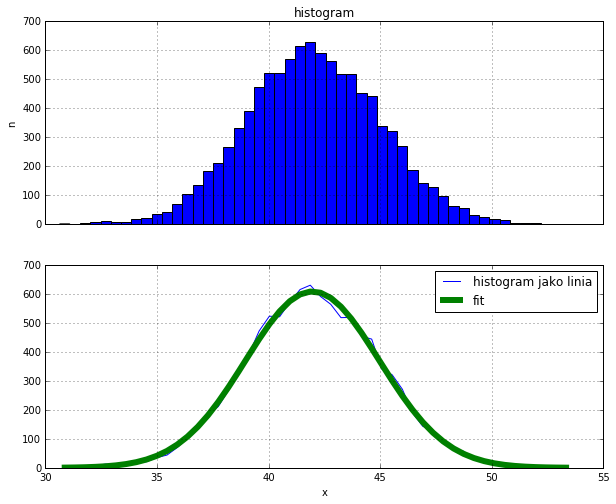

In [6]:
losowe = np.random.normal(loc = 42, scale=3, size=(10000,))
# plt.hist?

fig, (oś1, oś2) = plt.subplots(2, figsize=(10, 8), sharex=True)
histogram = oś1.hist(losowe, bins=50)
y = histogram[0]
krawedzie = histogram[1]
srodki = (krawedzie[0:-1] + krawedzie[1:])/2
oś2.set_xlabel("x")
oś1.set_ylabel("n")
oś1.set_title("histogram")
oś1.grid()
oś2.plot(srodki, y, label="histogram jako linia")


parametry, kowariancje = opt.curve_fit(gauss, srodki, y, p0=[500, 5, 42])
plt.plot(srodki, gauss(srodki, *parametry), lw=6, label="fit")
print(parametry)
oś2.legend()
oś2.grid()
# opt.curve_fit?

In [7]:
A = np.arange(10)
for funkcja in [np.min, np.max, np.mean, np.std]:
    print(funkcja, funkcja(A))

<function amin at 0x7f45a414a6a8> 0
<function amax at 0x7f45a414a620> 9
<function mean at 0x7f45a414ab70> 4.5
<function std at 0x7f45a414abf8> 2.87228132327


In [9]:
#multiline string
testowy_string = """litwo
ojczyzno moja
ty cośtam cośtam"""
print(testowy_string)


def funkcja():
    """to jest dokumentacja"""
    return 42
funkcja?

litwo
ojczyzno moja
ty cośtam cośtam


In [13]:
theta = np.linspace(0, 2*np.pi, 1000)
glowa_x = np.cos(theta)
glowa_y = np.sin(theta)

oko_x = glowa_x / 7
oko_y = glowa_y / 7 + 0.5


t = 1
fig, ax = plt.subplots()   #ZMIANA
usmiech_x = np.linspace(-0.5, 0.5, 100)
usmiech_y = -0.5 + t*(usmiech_x)**2 # t od -1 do +1: t = np.cos(theta)
plt.plot(glowa_x, glowa_y, "k-")
plt.plot(oko_x - 0.4, oko_y, "k-")
plt.plot(oko_x + 0.4, oko_y, "k-")
usmiech = plt.plot(usmiech_x, usmiech_y, "k-")[0]
plt.xlim(-2, 2)
plt.ylim(-2, 2)

def animate(t):
    usmiech_y = -0.5 + t * (usmiech_x)**2
    usmiech.set_data(usmiech_x, usmiech_y)
    return [usmiech]

from matplotlib import animation
%matplotlib qt
czas = np.cos(np.linspace(0, 2*np.pi, 120))
ani = animation.FuncAnimation(fig, animate, frames = czas, interval=1)
plt.show()